# Credit Card Approval prediction

In [1]:
# pip install pydotplus

In [2]:
#pip install graphviz

In [3]:
#conda install graphviz

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from sklearn import tree
import pydotplus

from IPython.display import HTML, display, Image

## 1. Load Data

In [5]:
cc_data=pd.read_csv("CC_data.csv")
#print first 10 rows of data to have a quick view
cc_data.head(10)


,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,43,560,+
2,a,24.5,0.500,u,g,q,h,1.500,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,120,0,+
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,360,0,+
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,164,31285,+
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,80,1349,+
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,180,314,+
9,b,42.5,4.915,y,p,w,v,3.165,t,f,0,t,g,52,1442,+


In [6]:
# original view of data frame's shape and types
print (cc_data.shape)
print (cc_data.info())

(690, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
Male              690 non-null object
Age               690 non-null object
Debt              690 non-null float64
Married           690 non-null object
BankCustomer      690 non-null object
EducationLevel    690 non-null object
Ethnicity         690 non-null object
YearsEmployed     690 non-null float64
PriorDefault      690 non-null object
Employed          690 non-null object
CreditScore       690 non-null int64
DriversLicense    690 non-null object
Citizen           690 non-null object
ZipCode           690 non-null object
Income            690 non-null int64
Approved          690 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 86.3+ KB
None


## 2. Data cleaning
### 2.1 Scan for missing value

In [7]:
#check for empty cells or Null
print(cc_data.isnull().sum())

Male              0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64


* However, this data contains "?" instead of Null for missing file

### 2.2 Replace missing values
> if value is numerical repalce with mean value of its column 
<br>
>if value is categrorical replace with mode value/most frequent value

In [8]:
# first, replace missing value "?" with Null.
cc_data.replace("?", np.nan, inplace=True)
# count Null in dataset again
cc_data.isnull().sum()

Male              12
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
Approved           0
dtype: int64

In [9]:
# convert Age and ZipCode Colume to numeric
cc_data["Age"]=pd.to_numeric(cc_data["Age"])
cc_data["ZipCode"]=pd.to_numeric(cc_data["ZipCode"])
#cc_data.info()

In [10]:
# impute the Null with mean value of its Numeric column
cc_data.fillna(cc_data.mean(), inplace=True)
# check Null again
cc_data.isnull().sum()
#notes NaNs in Age and Zipcode have been imputed.

Male              12
Age                0
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode            0
Income             0
Approved           0
dtype: int64

In [11]:
# impute null with most frequent value in object columns

for col in cc_data:
    if cc_data[col].dtypes== "object":
        cc_data[col].fillna(cc_data[col].mode()[0], inplace=True)
# last check for all nulls are replaced     
cc_data.isnull().sum()

Male              0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64

### 2.3 Transform categorical columns into numeric.
> use Label Encoder from sklearn

In [12]:
le=LabelEncoder()
for col in cc_data:
    if cc_data[col].dtypes== "object":
        cc_data[col]=le.fit_transform(cc_data[col])
#cc_data.info()

In [13]:
# Fine view of first 10 rows after cleaning
cc_data.head(10)

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,0,12,7,1.250,1,1,1,0,0,202.0,0,0
1,0,58.67,4.460,1,0,10,3,3.040,1,1,6,0,0,43.0,560,0
2,0,24.50,0.500,1,0,10,3,1.500,1,0,0,0,0,280.0,824,0
3,1,27.83,1.540,1,0,12,7,3.750,1,1,5,1,0,100.0,3,0
4,1,20.17,5.625,1,0,12,7,1.710,1,0,0,0,2,120.0,0,0
5,1,32.08,4.000,1,0,9,7,2.500,1,0,0,1,0,360.0,0,0
6,1,33.17,1.040,1,0,11,3,6.500,1,0,0,1,0,164.0,31285,0
7,0,22.92,11.585,1,0,2,7,0.040,1,0,0,0,0,80.0,1349,0
8,1,54.42,0.500,2,2,8,3,3.960,1,0,0,0,0,180.0,314,0
9,1,42.50,4.915,2,2,12,7,3.165,1,0,0,1,0,52.0,1442,0


## 3. Visualize the data
### 3.1 basic statistics 

In [14]:
cc_data.describe()

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,0.695652,31.568171,4.758725,1.233333,0.475362,5.698551,5.098551,2.223406,0.523188,0.427536,2.40000,0.457971,0.176812,184.014771,1017.385507,0.555072
std,0.460464,11.853273,4.978163,0.430063,0.850238,4.285748,2.510731,3.346513,0.499824,0.495080,4.86294,0.498592,0.557869,172.159274,5210.102598,0.497318
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.670000,1.000000,1.000000,0.000000,1.000000,3.000000,0.165000,0.000000,0.000000,0.00000,0.000000,0.000000,80.000000,0.000000,0.000000
50%,1.000000,28.625000,2.750000,1.000000,0.000000,5.000000,7.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,160.000000,5.000000,1.000000
75%,1.000000,37.707500,7.207500,1.000000,0.000000,10.000000,7.000000,2.625000,1.000000,1.000000,3.00000,1.000000,0.000000,272.000000,395.500000,1.000000
max,1.000000,80.250000,28.000000,2.000000,2.000000,13.000000,8.000000,28.500000,1.000000,1.000000,67.00000,1.000000,2.000000,2000.000000,100000.000000,1.000000


### 3.2 Correlation Matrix

In [15]:
corr=cc_data.corr()
corr_mask=np.triu(corr)

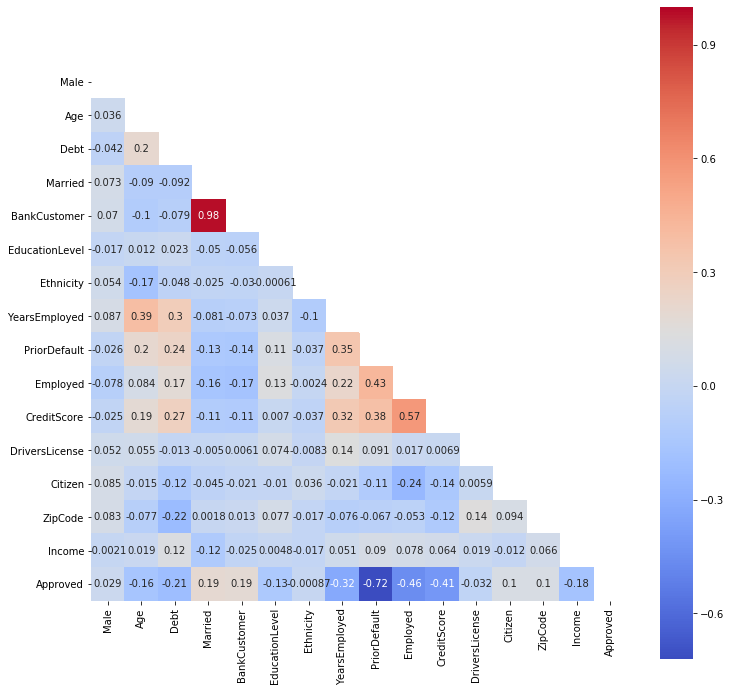

In [16]:
plt.figure(figsize = (12,12))

sns.heatmap(corr, annot=True, cmap="coolwarm", square=True, mask=corr_mask)
#plt.savefig("corrmatrix.jpg")

### 3.3 Count for Approval and deny

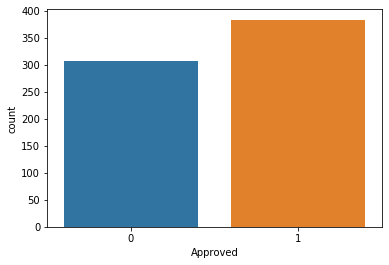

In [17]:
sns.countplot(data=cc_data, x="Approved")
# 0 for approved and 1 for denied
#plt.savefig("Approvalcount.jpg")

### 3.4 Distribution plots

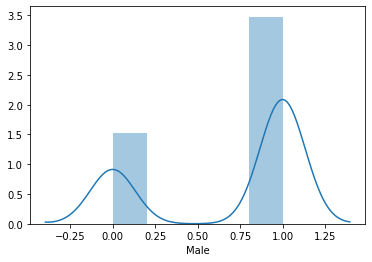

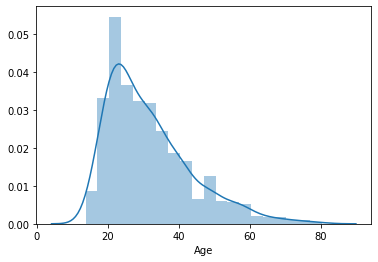

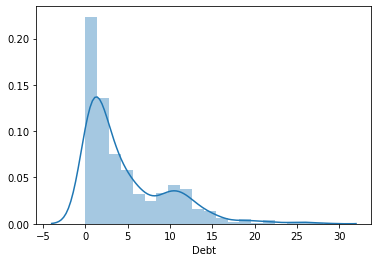

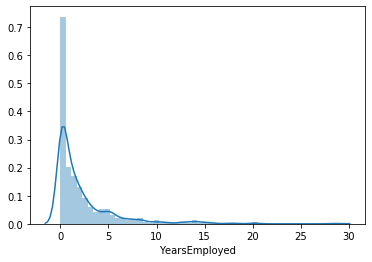

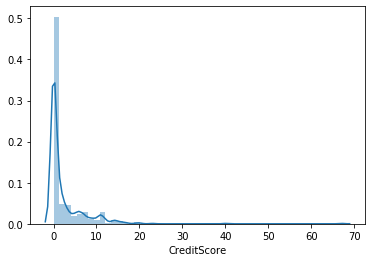

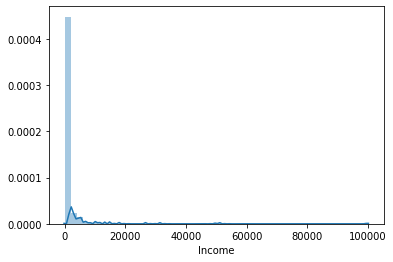

In [18]:
for col in ("Male","Age","Debt","YearsEmployed","CreditScore","Income"):
    sns.distplot(cc_data[col])
    plt.show()

#plt.savefig("distriplot.jpg")

## 4. Data Analysis
### 4.1 Identify target and contribute columns

In [19]:
feature_columns= cc_data.columns[:-1]
print(feature_columns)

Index(['Male', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel',
       'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore',
       'DriversLicense', 'Citizen', 'ZipCode', 'Income'],
      dtype='object')


In [20]:
#y is target and xs are feature factors 

y= cc_data["Approved"]


x= cc_data.iloc[:,cc_data.columns != "Approved"] 


### 4.2 Split the data into training and test with 70-30 ratio

In [21]:
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=0)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((483, 15), (483,), (207, 15), (207,))

### 4.3 Logistic Regression modeling

In [22]:
# fit train data with logistic regression
logistic_regression = LogisticRegression(solver='lbfgs',C=1)
logistic_regression.fit(x_train , y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### 4.3.1 Analysis this Logistic regression Model

In [23]:
# use this model to predict y with test data 
y_pred_log=logistic_regression.predict(x_test)

#state accuray of this regression model
print("Logistic Regresssion model has accuracy of: ", metrics.accuracy_score(y_test, y_pred_log))

Logistic Regresssion model has accuracy of:  0.782608695652174


In [24]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_log) 
print(confusion_matrix)

[[ 61  29]
 [ 16 101]]


In [25]:
TP = confusion_matrix[1, 1]
TN = confusion_matrix[0, 0]
FP = confusion_matrix[0, 1]
FN = confusion_matrix[1, 0]

display(HTML(
    '<table> '
    '<tr> <th>n='+str(len(y_test))+'</th>'
    '<th>predNO</th> '
    '<th>predYes</th> </tr>'
    '<tr> <td><b>Actual:NO</b></td>'
    '<td>TN = '+str(TN)+'</td> <td>FP = '+str(FP)+'</td></tr>'
    '<tr> <td><b>Actual:Yes</b></td> <td>FN = '+str(FN)+'</td> <td>TP = '+str(TP)+'</td> </tr> </table>'
))
#plt.savefig("conf_max_Logist.jpg")

n=207,predNO,predYes
Actual:NO,TN = 61,FP = 29
Actual:Yes,FN = 16,TP = 101


In [26]:
precision_logist = TP/(TP+FP)
recall_logist= TP/(TP + FN)
F1_logist=2 * (precision_logist * recall_logist) / (precision_logist + recall_logist)
print("This Logistic Regression Model has: ", "\n Precision of", precision_logist, "\n Recall of", recall_logist,
     "\n F1 of ", F1_logist)
#plt.savefig("F1_Logist.jpg")

This Logistic Regression Model has:  
 Precision of 0.7769230769230769 
 Recall of 0.8632478632478633 
 F1 of  0.8178137651821863


### 4.4 Decision Tree 

In [27]:
#fit train data with decision tree classifier
dtreeclf=DecisionTreeClassifier()
dtreeclf.fit(x_train , y_train)

#predit y with test x data
y_pred_dtree=dtreeclf.predict(x_test)

In [28]:
#state accuray of this decision tree classifier
print("Decision tree classifier has accuracy of: ", metrics.accuracy_score(y_test, y_pred_dtree))

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_dtree) 
print(confusion_matrix)

Decision tree classifier has accuracy of:  0.7971014492753623
[[66 24]
 [18 99]]


In [29]:
TP = confusion_matrix[1, 1]
TN = confusion_matrix[0, 0]
FP = confusion_matrix[0, 1]
FN = confusion_matrix[1, 0]

precision_dtree = TP/(TP+FP)
recall_dtree = TP/(TP + FN)
F1_dtree =2 * (precision_dtree * recall_dtree) / (precision_dtree + recall_dtree)
print("This Decision tree classifier Model has: ", "\n Precision of", precision_dtree, "\n Recall of", recall_dtree,
     "\n F1 of ", F1_dtree)
#plt.savefig("F1_Dtree.jpg")

This Decision tree classifier Model has:  
 Precision of 0.8048780487804879 
 Recall of 0.8461538461538461 
 F1 of  0.8250000000000001


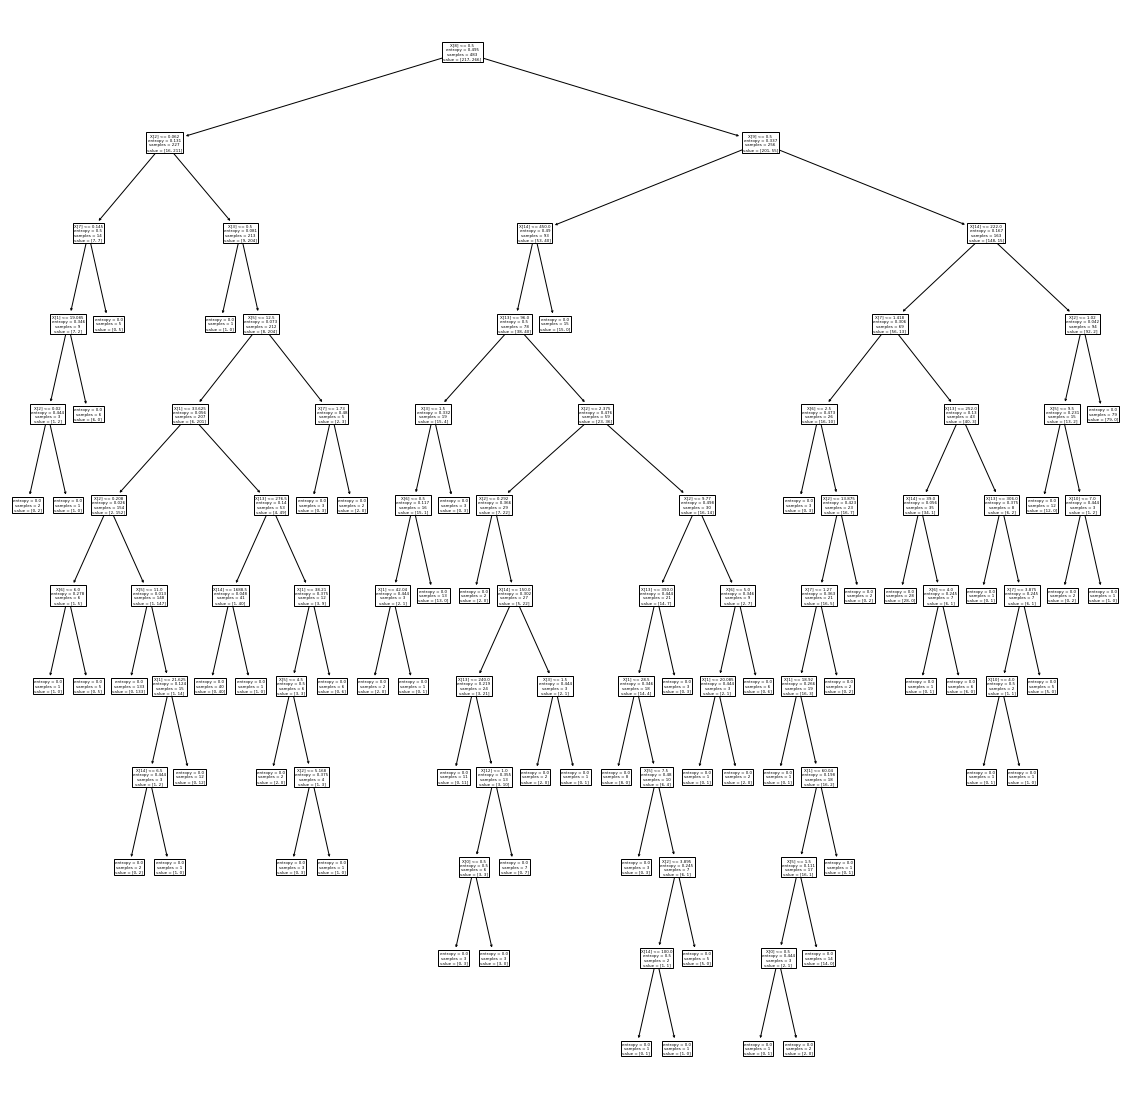

In [38]:
# visulize this Decision Tree
plt.figure(figsize =(20,20))
tree.plot_tree(dtreeclf)
plt.show()

### 4.5 Random Forest

In [39]:
#fit train data with Random Forest
rf = RandomForestClassifier(n_estimators=500)
rf.fit(x_train, y_train)
#state the accuracy
y_pred_rf = rf.predict(x_test)
print("Random Forest classifier has accuracy of: ", metrics.accuracy_score(y_test, y_pred_rf))


Random Forest classifier has accuracy of:  0.8647342995169082


In [40]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_rf) 
print(confusion_matrix)

TP = confusion_matrix[1, 1]
TN = confusion_matrix[0, 0]
FP = confusion_matrix[0, 1]
FN = confusion_matrix[1, 0]

precision_rf = TP/(TP+FP)
recall_rf = TP/(TP + FN)
F1_rf =2 * (precision_rf * recall_rf) / (precision_rf + recall_rf)
print("This Random Forest classifier Model has: ", "\n Precision of", precision_rf, "\n Recall of", recall_rf,
     "\n F1 of ", F1_rf)
#plt.savefig("F1_Rf.jpg")

[[ 72  18]
 [ 10 107]]
This Random Forest classifier Model has:  
 Precision of 0.856 
 Recall of 0.9145299145299145 
 F1 of  0.8842975206611571


### 4.5.2 Visulize importance of feature 

In [42]:
for name, importance in zip(feature_columns, rf.feature_importances_):
    print(name, "=", importance)

Male = 0.011581698851238258
Age = 0.0675608385750612
Debt = 0.08982275236827054
Married = 0.01793217411640259
BankCustomer = 0.01945442280702569
EducationLevel = 0.05362970549531262
Ethnicity = 0.022397764256745466
YearsEmployed = 0.10397092157602321
PriorDefault = 0.2730555161973721
Employed = 0.053234791954779384
CreditScore = 0.0988520036928879
DriversLicense = 0.011244717533544574
Citizen = 0.014202500378425348
ZipCode = 0.07298137216826822
Income = 0.09007882002864313


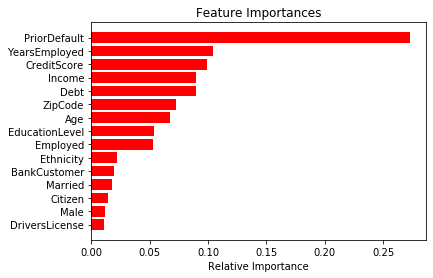

In [43]:
features = feature_columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## 5. Fit with my data

In [44]:
my_data=[0,28.5,0,1,2,2,7,1.5,0,0,0,0,0,70,500]

In [45]:
#fit in my data with all three classifier models

my_approval_log=logistic_regression.predict([my_data])
print ("Based on logistic regression model, my result is: ", my_approval_log)

my_approval_dtree=dtreeclf.predict([my_data])
print ("Based on Decision Tree model, my result is: ", my_approval_dtree)

my_approval_rf=rf.predict([my_data])
print ("Based on Random Forest model, my result is: ", my_approval_rf)

#plt.savefig("my_approval.jpg")

Based on logistic regression model, my result is:  [1]
Based on Decision Tree model, my result is:  [1]
Based on Random Forest model, my result is:  [1]
